# Define the scope of the project

### Step 1:-  Problem understanding

- Recent marketing campaigns have not been as effective as they were expected to be.
- Q1. Do customers buy products based on their income or based on the age group or based on the education level?
- Q2. Do customers purchase products through online store or store purchase?
- Q3. what and where to market our deals, so that customers visit the store?

### Step 2:- Goal

- You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.
- This notebook contains an analysis on some marketing data. The goal for this project was to do the following:

1. Get acquainted with the data
2. Clean the data so it is ready for analysis
3. Develop some questions for analysis
4. Analyze variables within the data to gain patterns and insights on these questions

### Step 3:- Data

- The data for this project was downloaded from Kaggle:

   https://www.kaggle.com/jackdaoud/marketing-data

Information regarding the features for the data are located in the Column section on the website.

Some code inspiration for this analysis was sourced from this noteboook.

### Step 4 :-  Data & Statistical Analysis 
After some data cleaning and tidying, the DataFrame is ready for EDA. The following independent variables will be focused on in the analysis:

- income
- education
- age.


- The goal will be to see how these independent variables associate with the following dependent variables:

. mnt_wines
. mnt_fruits
. mnt_meat_products
. mnt_fish_products
. mnt_sweet_products
. mnt_gold_products
. num_deals_purchases
. num_web_purchases
. num_catalog_purchases
. num_store_purchases

### Step 5 :- Evaluation

- The information we generate from our Analysis will be helpful for a marketing department strategies could be used to increase customers for the store.

## Import pythom Modules

In [115]:
%matplotlib inline

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import re

## Loading the Data

- `marketing_csv` are read in as `DataFrame` called `marketing_data`
-  The DataFrame is glimpsed with `.head()` to check its contents.
-  `marketing_data.info` to show concise summary of the DataFrame.

In [118]:
marketing_data = pd.read_csv("marketing_data.csv")
marketing_data.head()


,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [120]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProducts      2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

- see what columns have missing data
- Income has missing value


In [123]:
marketing_data.isnull().sum()

id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

  - describe() method,  generates descriptive statistics of numeric columns in a  dataframe, provides shape of a datsets's distribution excluding 'NaN' values.

In [126]:
marketing_data.describe()

,id,YearBirth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Cleaning
- `Income` variable is one of the main variables that will explored in the analysis, so it is essential that it is tidy and ready for exploration.
- `Income` has `dollar sign($)`, i will take out the `$` Change `Income value` to float and replace the missing values of income with the mean income using `.mean()` method. 
- Lets do some `Feature Engineering` to get `Age` that can be derived from `Year_Birth` and `Age_Group` from `Age`.

- If no income value is found, the `re.sub` operation will raise an error. To handle this, you can check if income is empty before applying `re.sub`.

In [146]:
def clean_income():
    Income = re.findall('\d+,\d+', row)
    if Income:
        Income = income.group()  # Extract the matched substring
        Income = re.sub('\W', '', Income)
        print(Income)
    else:
        return None

Text(0.5, 0, 'Income')

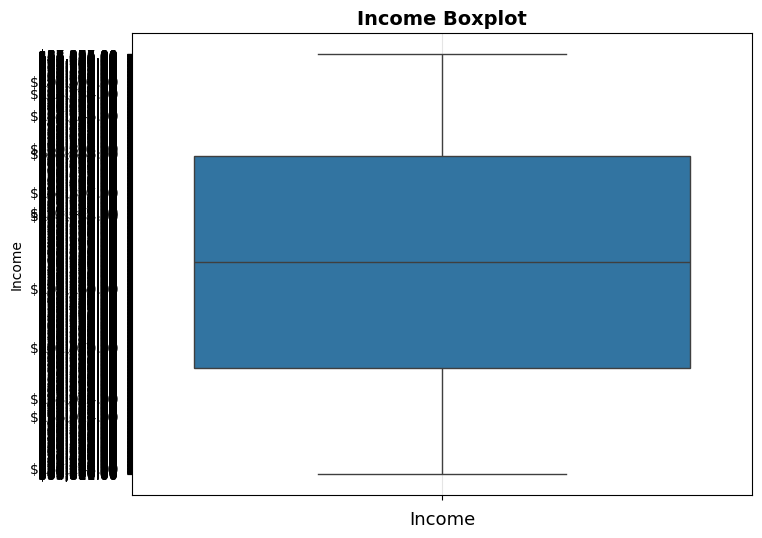

In [142]:

fig, ax = plt.subplots(figsize=(8,6))
colors = sns.color_palette()
sns.boxplot(marketing_data['Income'], ax=ax)

ax.xaxis.grid(alpha=0.33)
ax.set_axisbelow(True)

ax.set_title("Income Boxplot", fontsize=14, fontweight='bold')
ax.set_xlabel('Income', fontsize=13)


In [113]:
marketing_data['Age'].describe()

KeyError: 'Age'

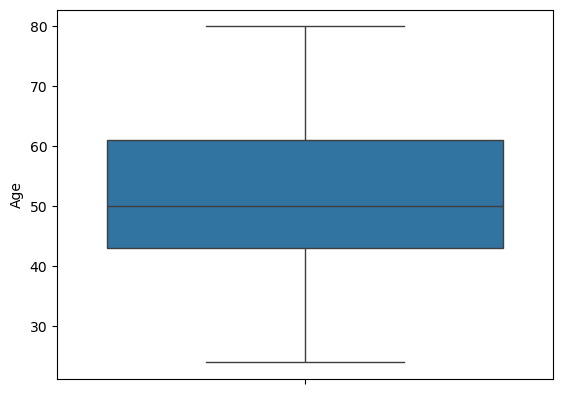

In [37]:
plt.figure()
sns.boxplot(marketing_data['Age'])
plt.show()

### Checking the education Variable
- the Education variable is another column that will be focused on in the analysis. A boxplot is used to see if any cleaning is needed before doing EDA

In [59]:
education_cols = ['education_Basic', 'education_Graduation', 'education_2n Cycle', 'education_Masters', 'education_PhD']
df_melted = marketing_data.melt(id_vars=['Income'], value_vars=education_cols, 
                                var_name='Education_Level', value_name='Education')

# Filter out rows where Education is NaN (assuming it indicates the person doesn't have that education level)
df_melted = df_melted.dropna(subset=['Education'])

# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education_Level', y='Income', data=df_melted,
            order=education_cols)
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.title('Income by Education Level')
plt.show()

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['education_Masters']"